## Business understanding
Water is a basic need and right for all human beings and access to clean and safe water remains a significant challenge in Tanzania, a country with a population exceeding 57 million people. While thousands of water points (wells and pumps) have been installed across the nation, not all of them function reliably. Many are partially functional, in need of repair, or completely non-functional. This undermines efforts to provide consistent access to water, particularly in rural areas. Using data on pump type, installation year, geographic location, and other related attributes, we can build a predictive model that classifies the condition of a water well. Such a system would help prioritize repairs, allocate resources effectively, and guide future infrastructure investments.

## Problem statement
The traditional model for water infrastructure management in Tanzania is reactive: a pump is serviced or repaired only after it has completely failed. This approach is inherently inefficient and costly, leading to prolonged periods without access to water for communities and significant expense for emergency repairs

This project is determined to build predictive model that represents a fundamental paradigm shift to proactive and data driven maintenance. and by leveraging historical data and machine learning, the model can anticipate which water points are at risk of failure or are already in a state of disrepair, enabling maintenance crews to intervene before a complete breakdown occurs.

## Objectives
The most critical and actionable objective of this project is to:
* Accurately identify water points that are currently functional but need repair
* Identify patterns in non-functional wells to inform better design, placement, and maintenance of new water points.

## Metrics of success
The success of the model will be evaluated using classification metrics:

* Accuracy
* precision and recall
* F1 score
* Confusion matrix

## Data understanding
The dataset from the Tanzania Ministry of Water provides records of waterpoints across the country. Each record describes the physical, technical, financial, and management aspects of a waterpoint, alongside its operating condition (target variable: functional, needs repair, or non-functional). The features provided can be grouped as follows:

1. Water availability & technical
 * amount_tsh: total static head (amount of water available)
 * gps_height: altitude of the well
 * construction_year: year the waterpoint was built
 * num_private: private codes/indicators (often missing or unused)
 
2. Location & geography
 * longitude, latitude: GPS coordinates
 * basin: geographic water basin
 * subvillage, region, region_code, district_code, lga, ward: administrative/geographic locations
 
3. Funding & installation
 * funder: who funded the well
 * installer: organization that installed the well
 * scheme_name: water scheme name
 * scheme_management: operator of the scheme
 
4. Management & governance

 * management, management_group: how the waterpoint is managed
 * public_meeting: whether a public meeting was held
 * permit: whether the waterpoint is permitted
 * recorded_by: group recording the data
 
5. Water extraction & source

 * extraction_type, extraction_type_group, extraction_type_class: type of pump/extraction system
 * source, source_type, source_class: water source information

6. Water quality & quantity
 * water_quality, quality_group: reported quality of the water
 * quantity, quantity_group: availability of water

7. Payment & financials
 * payment, payment_type: cost of water use

8. Waterpoint details
 * waterpoint_type, waterpoint_type_group: kind of waterpoint
 * wpt_name: waterpoint name (if present)
 * date_recorded: when the record was entered
 * population: number of people depending on the waterpoint

# Data preparation

In [687]:
# importing the relevant libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [688]:
# loading the datasets
trainig_values_df= pd.read_csv("training_set_values.csv", index_col= "id")
training_labels_df= pd.read_csv("training_set_labels.csv", index_col= "id")
test_values_df= pd.read_csv("test_set_values.csv")



In [ ]:
# reading the training set values df
trainig_values_df.shape

In [689]:
training_labels_df.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [690]:
test_values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [691]:
# printing the shapes all together 
print("Observation:")
print(f"The training set values has {trainig_values_df.shape[0]} records and {trainig_values_df.shape[1]} features")
print(f"The training set values has {training_labels_df.shape[0]} records and {training_labels_df.shape[1]} features")
print(f"The training set values has {test_values_df.shape[0]} records and {test_values_df.shape[1]} features")


Observation:
The training set values has 59400 records and 39 features
The training set values has 59400 records and 1 features
The training set values has 14850 records and 40 features


In [692]:
# joining training labels and training values df
train_df= pd.concat([trainig_values_df, training_labels_df], axis= 1)

In [693]:
# checking the shape of the joined data
train_df.shape

(59400, 40)

In [694]:
# checking the df
train_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Cleaning columns with null values

In [695]:
# checking datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

Observation: 
    
There are a total of 9 numerical columns and 31 columns with categorical values

In [696]:
# checking for missing values in training set values df
missing_values= train_df.isna().sum()

missing_counts= missing_values.sort_values(ascending= False)
missing_counts

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
recorded_by                  0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
date_recorded                0
basin                        0
status_group                 0
waterpoint_type_group        0
construction_year            0
waterpoint_type              0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
water_quality                0
payment_

In [697]:
# checking columns with the missing values
missing_cols = train_df.columns[train_df.isnull().any()].tolist()

print(f"Columns with missing values: {missing_cols}")

Columns with missing values: ['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


Observation:
    
The train_df dataset has less columns with missing values, just a few columns like scheme name, scheme management, installer, funder, public meeting, permit and subvillage with some missing values which can be handled. 

In [698]:
# checking for value counts in columns with missing values
for col in missing_cols:
    print(f"\nColumn: {col}")
    print(train_df[col].value_counts(dropna=False))


Column: funder
Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Mbeje                        1
Tadeo                        1
Seram                        1
Kanisani                     1
Huches                       1
Name: funder, Length: 1898, dtype: int64

Column: installer
DWE                         17402
NaN                          3655
Government                   1825
RWE                          1206
Commu                        1060
                            ...  
Huches                          1
VILLAGE                         1
Shule ya sekondari Ipuli        1
TANZANIAN GOVERNMENT            1
local technitian                1
Name: installer, Length: 2146, dtype: int64

Column: subvillage
Madukani      508
Shuleni       506
Majengo       502
Kati          373
NaN           371
             ... 
Unyambaa        1
Lunyami         1
K

#### Cleaning installer column

In [699]:
# filling in missing values in installer column
train_df['installer'] = train_df['installer'].str.lower().str.strip() # normalizing text
train_df["installer"].value_counts()[:20]

dwe                   17405
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        961
kkkt                    910
0                       777
central government      763
tcrs                    707
world vision            699
danid                   624
ces                     610
community               555
gover                   511
amref                   443
lga                     413
tasaf                   411
wedeco                  398
Name: installer, dtype: int64

In [700]:
# mapping to unify common mispellings
mapping = {
'world vission': 'world vision',
 'world division': 'world vision',
 'would bank': 'world bank',
 'word bank': 'world bank',
 'world banks': 'world bank',
 'word divisio': 'world division',
 'danid': 'danida',
 'governm': 'government',
 'cental government': 'central government',
 'central govt': 'central government',
 'govern': 'government',
 'serikali': 'government',
 'oxfarm': 'oxfam',
 'unisef': 'unicef',
 'commu': 'community',
 'gove': 'government',
 'finw': 'fini water',
 'fw': 'fini water',
 'finwater': 'fini water',
 'finn water': 'fini water',
 'fin water': 'fini water',
 'gover': 'government',
 '0': 'unknown',
 '-': 'unknown',
 'acra': 'accra',
 'centr': 'central government',
 'communit': 'community',
 'comunity': 'community',
 'cartas': 'caritas',
 'conce': 'concern',
 'not known': 'unknown'}

In [701]:
# replacing in the mapped values
train_df["installer"] = train_df["installer"].replace(mapping)
# test_values_df["installer"] = test_values_df["installer"].replace(mapping)

In [702]:
train_df['installer'].fillna("other", inplace= True)

In [703]:
# Keep top 20 installers and group the rest into "other".
top_installers = train_df["installer"].value_counts().nlargest(20).index
train_df["installer"] = train_df["installer"].apply(lambda x: x if x in top_installers else "other")
train_df["installer"].unique().tolist()

['other',
 'world vision',
 'dwe',
 'danida',
 'wedeco',
 'district council',
 'unknown',
 'central government',
 'community',
 'lga',
 'government',
 'kkkt',
 'rwe',
 'hesawa',
 'ces',
 'tasaf',
 'fini water',
 'amref',
 'dmdd',
 'tcrs']

### cleaning funder column


In [704]:
# checking value counts of the top 20
train_df["funder"].value_counts()[:20]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [705]:
# normalizing values in funder column for both training

train_df['funder'] = train_df['funder'].str.lower().str.strip() # normalizing text
# test_values_df['funder'] = test_values_df['funder'].str.lower().str.strip()

In [706]:
# listing the unique value to identify mispelled mistakes
train_df["funder"].unique().tolist()

['roman',
 'grumeti',
 'lottery club',
 'unicef',
 'action in a',
 'mkinga distric coun',
 'dwsp',
 'rwssp',
 'wateraid',
 'isingiro ho',
 'private',
 'danida',
 'world vision',
 'lawatefuka water supply',
 'biore',
 'rudep',
 'hesawa',
 'twe',
 'isf',
 'african development bank',
 'government of tanzania',
 'sobodo',
 'water',
 'private individual',
 'undp',
 nan,
 'not known',
 'kirde',
 'cefa',
 'ces(gmbh)',
 'european union',
 'lga',
 'district council',
 'muwsa',
 'dwe/norad',
 'kkkt_makwale',
 'sawaka',
 'ces (gmbh)',
 'olgilai village community',
 'kkkt',
 'roman catholic',
 'norad',
 'adra',
 'sema',
 'piusi',
 'dwe',
 'rc church',
 'swisland/ mount meru flowers',
 'ifad',
 'swedish',
 'idc',
 'he',
 'isf/tacare',
 'jica',
 'mzee sh',
 'aict',
 'tcrs',
 'kiuma',
 'germany republi',
 'netherlands',
 'ruthe',
 'tulawaka gold mine',
 'nethalan',
 'tasaf',
 'concern world wide',
 'wfp',
 'lips',
 'sida',
 'world bank',
 'tanza',
 '0',
 'sw',
 'shipo',
 'fini water',
 'kanisa',
 'ox

In [707]:
# mapping to unify common mispellings
mapping = {
    "oxfarm": "oxfam",
    "oxfam gb": "oxfam",
    "govt of tanzania": "government of tanzania",
    "tanzania government": "government of tanzania",
    "germany republi": "german republic",
    "gvt": "government of tanzania",
    "serikaru": "government of tanzania",
    "serikali": "government of tanzania",
    "serikari": "government of tanzania",
    "usa embassy": "us embassy",
    "ubalozi wa marekani": "us embassy",
    "u.s.a": "usa",
    "world vision": "world vision",
    "vision world": "world vision",
    "roman": "roman catholic",
    "rc church": "roman catholic",
    "catholic church": "roman church",
    "rc ch": "roman catholic",
    "roman cathoric same": "roman catholic",
    "roman church": "roman catholic",
    "roman cathoric": "roman catholic",
    "kanisa katoliki": "roman catholic",
    "roman cathoric church": "roman catholic",
    "roman ca": "roman catholic",
    "nethe": "netherlands",
    "nethalan": "netherlands",
    "finw": "fini water",
    "finn water": "fini water",
    "finwater": "fini water",
    "fin water": "fini water",
    "commu": "community",
    "unicef": "unicef",
    "hamref": "amref",
    "village govt": "village government",
    "serkali ya kijiji": "village government",
    "priva": "private individual",
    "private": "private individual",
    "0": "unknown",
    "not known": "unknown"}

In [708]:
train_df["funder"] = train_df["funder"].replace(mapping)
# test_values_df['funder'] = test_values_df["funder"].replace(mapping)

In [709]:
# filling null values unknown
train_df["funder"].fillna("other", inplace= True)

In [710]:
# Keep top 20 funders and group the rest into "other".
top_funders = train_df["funder"].value_counts().nlargest(20).index
train_df["funder"] = train_df["funder"].apply(lambda x: x if x in top_funders else "other")

train_df["funder"].unique().tolist()

['roman catholic',
 'other',
 'unicef',
 'dwsp',
 'rwssp',
 'private individual',
 'danida',
 'world vision',
 'hesawa',
 'government of tanzania',
 'unknown',
 'district council',
 'kkkt',
 'norad',
 'german republic',
 'netherlands',
 'tasaf',
 'world bank',
 'fini water',
 'dhv']

In [711]:
# top_funders = test_values_df["funder"].value_counts().nlargest(20).index
# test_values_df['funder'] = test_values_df['funder'].apply(lambda x: x if x in top_funders else 'other')
# test_values_df["funder"].unique().tolist()

In [712]:
# checking null values in installer column
train_df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

#### Cleaning public meeting column


In [713]:
# checking column values
train_df.public_meeting.value_counts(dropna= False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

In [714]:
# filling NaN with unknown
train_df.public_meeting.fillna('unknown', inplace=True)

In [715]:
# Changing all the values to be strings instead of boolen
train_df.public_meeting = train_df.public_meeting.astype('str')

#### Cleaning permit column


In [716]:
# checking column values
train_df.permit.value_counts(dropna= False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

In [717]:
# replacing NaN with unknown
train_df.permit.fillna('unknown', inplace=True)

In [718]:
# Changing all the values to be strings instead of boolen
train_df.permit = train_df.permit.astype('str')

#### Cleaning scheme name and scheme management columns

In [719]:
train_df.scheme_name.value_counts()

K                                          682
None                                       644
Borehole                                   546
Chalinze wate                              405
M                                          400
                                          ... 
Mpin                                         1
Shilabela                                    1
Rural water supply &sanitation  program      1
Sero water scheme                            1
Tove-mtwango                                 1
Name: scheme_name, Length: 2696, dtype: int64

In [720]:
# dropping scheme name column because the information is not valuable and also it has alot of missing values
train_df.drop('scheme_name', axis=1, inplace=True)

In [721]:
# checking scheme management counts
train_df.scheme_management.value_counts(dropna= False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [722]:
# filling in missing values with other
train_df.scheme_management.fillna('None', inplace=True)

In [723]:
# checking for effectiveness
train_df["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
None                 3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

In [724]:
# checking subvillage column
train_df["subvillage"].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Lunyami           1
Mubule            1
Kankundane        1
Maghaghie         1
Kibonwangoma      1
Name: subvillage, Length: 19287, dtype: int64

In [725]:
# dropping the column because it has missing values and also wont be neccesary in the modeling
train_df.drop("subvillage", axis= 1, inplace= True)

#### Counterchecking columns without null values

In [726]:
# checking all columns value counts

for col in train_df.columns:
    print(f"\nColumn: {col}")
    print(train_df[col].value_counts(dropna=False).head(10))


Column: amount_tsh
0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
200.0      1220
100.0       816
10.0        806
30.0        743
2000.0      704
Name: amount_tsh, dtype: int64

Column: date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
Name: date_recorded, dtype: int64

Column: funder
other                     29739
government of tanzania     9129
danida                     3114
hesawa                     2202
rwssp                      1374
world bank                 1349
kkkt                       1287
world vision               1246
private individual         1126
unicef                     1057
Name: funder, dtype: int64

Column: gps_height
 0       20438
-15         60
-16         55
-13         55
-20         52
 1290       52
-14         51
 303        51
-18         49
-19         47
Name: gps_height, d

#### amount column

In [727]:
# changing amount column to interger
train_df.amount_tsh = train_df.amount_tsh.astype('int64')

#### date recorded

In [728]:
# converting date_recorded to date time format
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
train_df["date_recorded"].dt.year.value_counts(dropna= False)

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

Observation: 

The above information shows that the number of wells recorded increases over time.
with the highest number of wells recorded(about 28674) in 2011 and 2013, while the lowest number was recorded in 2004(30) and 2002(1) 
which suggests that the well construction efforts begun much later. is could possibly be because of the emergence funding from the NGO

#### Gps_height

In [729]:
# rechecking gps_gps_heigh value_counts
train_df["gps_height"].value_counts(dropna= False)


 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

Observation:

This values show the range of altitudes where the water points are located from negative to altitude above 2000m
Most number of water points are located in the areas of 0 altitude that is near or at the sea level. 


In [730]:
# counter checking value counts
train_df["longitude"].value_counts(dropna= False)

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

Observation:
The longitude of 0 is nearly an impossible longitude in area like tanzania. These 0 values could be the placeholder for missing longitude values 
we need to find a way of imputing the 0 values. the one option is to replace them with null values and later impute with the median of the region after rgrouping by region

In [731]:
train_df["latitude"].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

Observation:
    
There are a lot of zero values for latitude and longitude which are not possible for Tanzania's location.

In [732]:
# number of wells constructed per year
train_df["construction_year"].value_counts(dropna= False)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

Observation:

The 0 construction year is an error during data entry and therefore it has the highest values(20709), this because there is no 0 years it should a value greater the zero to indicate the year the well was constructed.

In [733]:
# handling zeros in the construction year column
""" Construction year column has alot of 0 values as years of construction shown in the value_counts above."""

# finding exact number of zero years
zero_years= (train_df["construction_year"]== 0).sum()
print(f"Number of records with construction_year = 0: {zero_years}")


Number of records with construction_year = 0: 20709


In [734]:
# replacing  0 in construction years with null values 
train_df['construction_year'] = train_df['construction_year'].replace(0, np.nan)

# # calculating well age using date_recorded
# train_df["well_age"]= train_df['date_recorded'].dt.year - train_df["construction_year"]

# train_df['well_age'].value_counts()

# calculating the  median of the construction year where years is not zero
year_median = int(train_df[train_df['construction_year'] != 0]['construction_year'].median())


#  Filling NaN with the median
train_df['construction_year'].fillna(year_median, inplace= True)

In [735]:
# checking the column
train_df["construction_year"].value_counts(dropna= False)

2000.0    22800
2010.0     2645
2008.0     2613
2009.0     2533
2007.0     1587
2006.0     1471
2003.0     1286
2011.0     1256
2004.0     1123
2012.0     1084
2002.0     1075
1978.0     1037
1995.0     1014
2005.0     1011
1999.0      979
1998.0      966
1990.0      954
1985.0      945
1996.0      811
1980.0      811
1984.0      779
1982.0      744
1994.0      738
1972.0      708
1974.0      676
1997.0      644
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1987.0      302
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: construction_year, dtype: int64

In [736]:
# # filling in missing well age values with median
# train_df['well_age'] = train_df['well_age'].fillna(train_df['well_age'].median())

In [737]:
# # checking missing values in well age column
# train_df['well_age'].isna().sum()

#### Wpt_name column 

In [738]:
# checking value_counts
train_df["wpt_name"].value_counts(dropna= False)

none                  3563
Shuleni               1748
Zahanati               830
Msikitini              535
Kanisani               323
                      ... 
Kwa Buswelu Tereza       1
Kwa Filemoni             1
Njaba                    1
Kwa Mkuni                1
Kakombe                  1
Name: wpt_name, Length: 37400, dtype: int64

In [739]:
#  dropping this column as it only contains names of the wells which is not neccessary in our analysis
train_df.drop('wpt_name', axis=1, inplace=True)

#### Num_private column

In [740]:
# crosschecking counts
train_df['num_private'].value_counts(normalize= True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

In [741]:
# dropping num column since we would not need in our analysis
train_df.drop("num_private", axis= 1, inplace= True)

#### basin column

In [742]:
# checking for value_counts
train_df["basin"].value_counts(dropna= False)

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

#### Region and region code columns

In [743]:
# checking values counts
train_df[["region", "region_code"]].value_counts()

region         region_code
Iringa         11             5294
Shinyanga      17             4956
Mbeya          12             4639
Kilimanjaro    3              4379
Morogoro       5              4006
Kagera         18             3316
Mwanza         19             3047
Arusha         2              3024
Kigoma         16             2816
Ruvuma         10             2640
Tanga          4              2513
Dodoma         1              2201
Singida        13             2093
Mara           20             1969
Tabora         14             1959
Rukwa          15             1808
Pwani          6              1609
Manyara        21             1583
Lindi          80             1238
Pwani          60             1025
Mtwara         90              917
Dar es Salaam  7               805
Mtwara         99              423
               9               390
Arusha         24              326
Lindi          8               300
Mwanza         17               55
Tanga          5            

Observation:
    
Since we have a manageable amount of regions, we would have to drop the region code column because we can identify the region by its name

In [744]:
# dropping region_code
train_df.drop('region_code', axis=1, inplace=True)

#### District code

In [745]:
# checking value counts
train_df["district_code"].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [746]:
# dropping the column as it will not be used elsewhere
train_df.drop('district_code', axis=1, inplace=True)

#### Lga Column

In [747]:
# checking column values
train_df['lga'].value_counts(dropna = False, normalize=True)


Njombe          0.042138
Arusha Rural    0.021077
Moshi Rural     0.021061
Bariadi         0.019815
Rungwe          0.018620
                  ...   
Moshi Urban     0.001330
Kigoma Urban    0.001195
Arusha Urban    0.001061
Lindi Urban     0.000354
Nyamagana       0.000017
Name: lga, Length: 125, dtype: float64

#### Ward

In [748]:
# checking column values
train_df["ward"].value_counts()

Igosi          307
Imalinyi       252
Siha Kati      232
Mdandu         231
Nduruma        217
              ... 
Igogo            1
Korongoni        1
Mawenzi          1
Ukata            1
Machinjioni      1
Name: ward, Length: 2092, dtype: int64

In [749]:
# dropping the ward column
train_df.drop('ward', axis=1, inplace=True)

#### Population

In [750]:
# value counts
train_df.population.value_counts(dropna=False)

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

Observation:

will keep the zero values for population because there's no evidence that a well cannot exist in an area with no registered population.

#### Recorded_by column

In [751]:
# Looking at column values
train_df.recorded_by.value_counts(dropna=False)

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

Observation:
    
As per the value counts there seems to be only one firm that did data recording. so for that reason we would not need this column

In [752]:
# dropping the column
train_df.drop("recorded_by", axis= 1, inplace= True)

#### Extraction columns

In [753]:
# checking the extraction type, extraction type group and extraction type class
#  extraction_type
train_df["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [754]:
# extraction type_group
train_df["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [755]:
# extraction type class
train_df["extraction_type_class"].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [756]:
# Dropping the columns that contain nearly duplicate information
train_df.drop(columns=['extraction_type_group', 'extraction_type_class'], 
        inplace=True)

#### Management and management group columns

In [757]:
# checking the column valuies
train_df["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [758]:
# management group column
train_df["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

Observation:
    
Since both columns play similar role of management, we will have to drop one column particularly management_group because it provides general management class of the organization as opposed to management column that is a bit specific to the managing organization

In [759]:
# dropping the management group column
train_df.drop("management_group", axis= 1, inplace= True)

#### Payment and payment type columns

In [760]:
# checking payment column values
train_df["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [761]:
# checking payment type column values
train_df["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Observation:
    
Both the payment and the payment type consist of same information, we will have to drop one

In [762]:
# dropping payment type column
train_df.drop("payment", axis= 1, inplace= True)

#### Water quality 

In [763]:
# checking column values
train_df["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

#### Quality group

In [764]:
# check the quality group values
train_df["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Observation:

The above columns nearly consist of similar information, therefore we will have to drop one 


In [765]:
# dropping quality group
train_df.drop("quality_group", axis= 1, inplace= True)

#### Quantity and quantity group columns

In [766]:
train_df["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [767]:
# quantity_group column
train_df["quantity_group"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [768]:
# dropping quantity column as it has simillar information
train_df.drop("quantity_group", axis= 1, inplace= True)

#### Source , source_type, source_class Columns

In [769]:
train_df[["source", "source_type", "source_class",]].value_counts()

source                source_type           source_class
spring                spring                groundwater     17021
shallow well          shallow well          groundwater     16824
machine dbh           borehole              groundwater     11075
river                 river/lake            surface          9612
rainwater harvesting  rainwater harvesting  surface          2295
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
dam                   dam                   surface           656
other                 other                 unknown           212
unknown               other                 unknown            66
dtype: int64

Observation:
    
The columns have pretty similar information, we will drop source type and source class column

In [770]:
# dropping source_type and source_class columns
train_df.drop(["source_class", "source_type"], axis= 1, inplace= True)

#### Waterpoint_type and waterpoint_group columns

In [771]:
# checking values
train_df["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [772]:
# waterpoint_type_group
train_df["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [773]:
# dropping one columns because they have simillar information
train_df.drop("waterpoint_type_group", axis= 1, inplace= True)

In [774]:
# checking the remaining columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   amount_tsh         59400 non-null  int64         
 1   date_recorded      59400 non-null  datetime64[ns]
 2   funder             59400 non-null  object        
 3   gps_height         59400 non-null  int64         
 4   installer          59400 non-null  object        
 5   longitude          59400 non-null  float64       
 6   latitude           59400 non-null  float64       
 7   basin              59400 non-null  object        
 8   region             59400 non-null  object        
 9   lga                59400 non-null  object        
 10  population         59400 non-null  int64         
 11  public_meeting     59400 non-null  object        
 12  scheme_management  59400 non-null  object        
 13  permit             59400 non-null  object        
 14  co

In [775]:
# checking for null values 
train_df.isna().sum()

amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
lga                  0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

In [776]:
# checking value_counts of the target variable
train_df.status_group.value_counts(dropna= False, normalize= True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Observation: 

Majority of wells are functional(54%), but there is still a significant proportion that are neither non-functionall nor need repair(about 45%)
There is a major class imbalance as functional wells are much more common than those that are non-function and also those that need repair
We may need SMOTE technique to solve the imbalance problem

## EDA

### univariate analysis

* The focus is on numerical features
* we are going to plot histograms, KDE plots and box plots to check distribution and outliers

In [306]:
# identifying categorical columns

numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols



# plt.figure(figsize=(6,4))
# sns.histplot(train_df[col], kde=True)
# plt.title(f"Distribution of {col}")
# plt.show()

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'well_age'],
      dtype='object')

In [345]:
train_df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

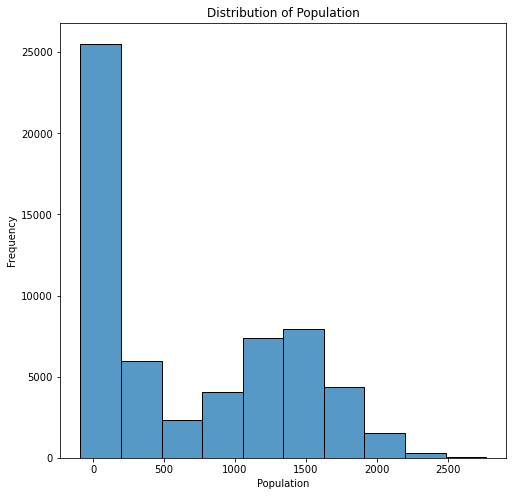

In [344]:
# gps_height distribution
plt.figure(figsize=(8,8))
sns.histplot(train_df['gps_height'], bins= 10)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()


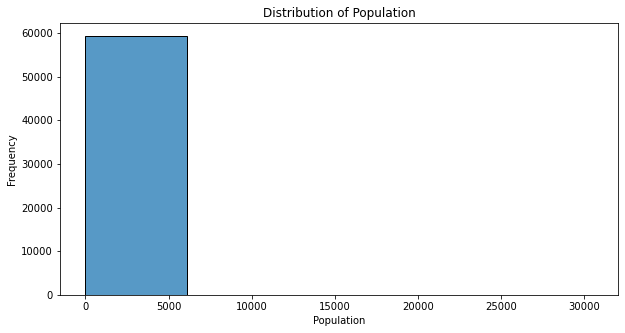

In [342]:

plt.figure(figsize=(10, 5))
sns.histplot(train_df['population'], bins= 5)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

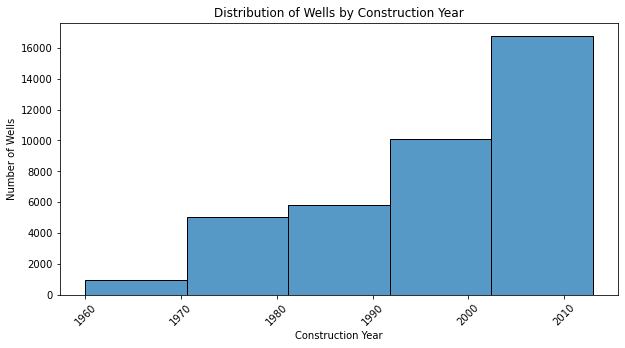

In [337]:
# distribution of wells constucted per year


plt.figure(figsize=(10,5))
sns.histplot(train_df["construction_year"], bins=5, kde=False)
plt.title("Distribution of Wells by Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Number of Wells")
plt.xticks(rotation=45)
plt.show()

Observation:
    
The distribution of wells by construction year shows that the number increases over time. the highest number of wells were constructed in the most recent years.

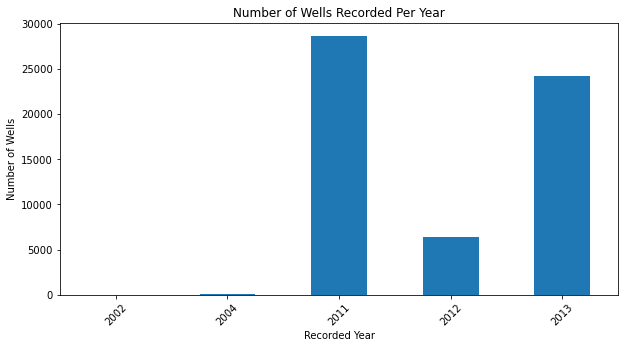

In [331]:
# 
# Count wells per year
year_counts = train_df["date_recorded"].dt.year.value_counts().sort_index()

year_counts
plt.figure(figsize=(10,5))
year_counts.plot(kind='bar')
plt.title("Number of Wells Recorded Per Year")
plt.xlabel("Recorded Year")
plt.ylabel("Number of Wells")
plt.xticks(rotation=45)
plt.show()

Observation:
    
The majority of wells were recorded between 2011 and 2013, with 2011 showing the highest number of records. Very few wells were recorded before 2011, and almost none before 2002. This suggests that data collection efforts were concentrated in the early 2010s, likely due to large-scale government or NGO surveys. As a result, the dataset primarily reflects the state of water points during this period rather than over the entire lifetime of the wells. 

In [ ]:
plt.hist(train_df["gps_height"], bins=5)
plt.xlabel("Altitude (m)")
plt.ylabel("Count")
plt.title("Distribution of Altitudes (Excluding Zero)")
plt.show()